# Importing required libraries

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import random
import math
import sys

sns.set()
%matplotlib inline

np.set_printoptions(precision=2, suppress=True) # threshold=sys.maxsize)

import warnings
warnings.filterwarnings('ignore')

# plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10, 10)

# Point Estimates and Confidence Intervals

## Point Estimates

Point estimates are estimates of population parameters based on sample data. For instance, if we wanted to know the average age of registered voters in the U.S., we could take a survey of registered voters and then use the average age of the respondents as a point estimate of the average age of the population as a whole. The average of a sample is known as the sample mean.

The sample mean is usually not exactly the same as the population mean. This difference can be caused by many factors including poor survey design, biased sampling methods and the randomness inherent to drawing a sample from a population. Let's investigate point estimates by generating a population of random age data and then drawing a sample from it to estimate the mean:

In [4]:
np.random.seed(10)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

population_ages.mean()

43.002372

In [5]:
stats.poisson.rvs(loc=10, mu=10, size=15)

array([23, 20, 23, 21, 20, 24, 19, 17, 19, 21, 19, 24, 21, 16, 20])

In [6]:
population_ages1

array([58, 55, 53, ..., 50, 46, 49])

In [7]:
np.random.seed(6)

# Sample 1000 values
sample_ages = np.random.choice(a=population_ages, size=500)

print(f'Sample mean: {sample_ages.mean()}') # Show sample mean

# Check difference between means
print(f'Difference between means: {population_ages.mean() - sample_ages.mean()}')

Sample mean: 42.388
Difference between means: 0.614372000000003


Our point estimate based on a sample of 500 individuals underestimates the true population mean by 0.6 years, but it is close. This illustrates an important point: we can get a fairly accurate estimate of a large population by sampling a relatively small subset of individuals.

Another point estimate that may be of interest is the proportion of the population that belongs to some category or subgroup. For example, we might like to know the race of each voter we poll, to get a sense of the overall demographics of the voter base. You can make a point estimate of this sort of proportion by taking a sample and then checking the ratio in the sample:

In [8]:
random.seed(10)

population_counts = {
    'white': 100000,
    'black': 50000,
    'hispanic': 50000,
    'asian': 25000,
    'other': 25000,
}

population_races = (["white"] * population_counts['white']) + (["black"] * population_counts['black']) +\
                   (["hispanic"] * population_counts['hispanic']) + (["asian"] * population_counts['asian']) +\
                   (["other"] * population_counts['other'])
population_size = len(population_races)

# Sample 1000 values
sample_size = 1000
demo_sample = random.sample(population_races, sample_size)

for race in set(demo_sample):
    print(f'{race} proportion estimate: {demo_sample.count(race) / sample_size}; {race} true proportion: {population_counts[race] / population_size}')

other proportion estimate: 0.099; other true proportion: 0.1
white proportion estimate: 0.379; white true proportion: 0.4
black proportion estimate: 0.231; black true proportion: 0.2
asian proportion estimate: 0.099; asian true proportion: 0.1
hispanic proportion estimate: 0.192; hispanic true proportion: 0.2


Notice that the proportion estimates are close to the true underlying population proportions.

## Confidence Intervals

The terms confidence level and confidence interval are often confused.

**A $95\%$ confidence level** means is that if the survey or experiment were repeated, $95\%$ percent of the time the data would match the results from the entire population. Sometimes you just can’t survey everyone because of time or cost (think about how much it would cost to do a telephone survey of over 300 million Americans!).Therefore, you take a sample of the population. Having a $95\%$ confidence level means that you’re almost certain your results are the same as if you had surveyed everyone.

**A $95\%$ confidence interval** gives you a very specific set of numbers for your confidence level. For example, let’s suppose you were surveying a local school to see what the student’s state test scores are. You set a $95\%$ confidence level and find that the $95\%$ confidence interval is ($780,900$). That means if you repeated this over and over, $95\%$ percent of the time the scores would fall somewhere between $780$ and $900$.


Let's calculate a 95% confidence for our mean point estimate:

In [9]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a=population_ages, size=sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q=0.975) # Get the z-critical value*

print(f"z-critical value: {z_critical}") # Check the z-critical value

pop_stdev = population_ages.std() # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

print(f"Confidence interval: {confidence_interval}")

z-critical value: 1.959963984540054
Confidence interval: (41.70306406882683, 43.34293593117317)


In [10]:
np.random.seed(12)

sample_size = 1000
z_critical = stats.norm.ppf(q=0.975) # Get the z-critical value*
pop_stdev = population_ages.std() # Get the population standard deviation

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a=population_ages, size=sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)


    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)

    intervals.append(confidence_interval)

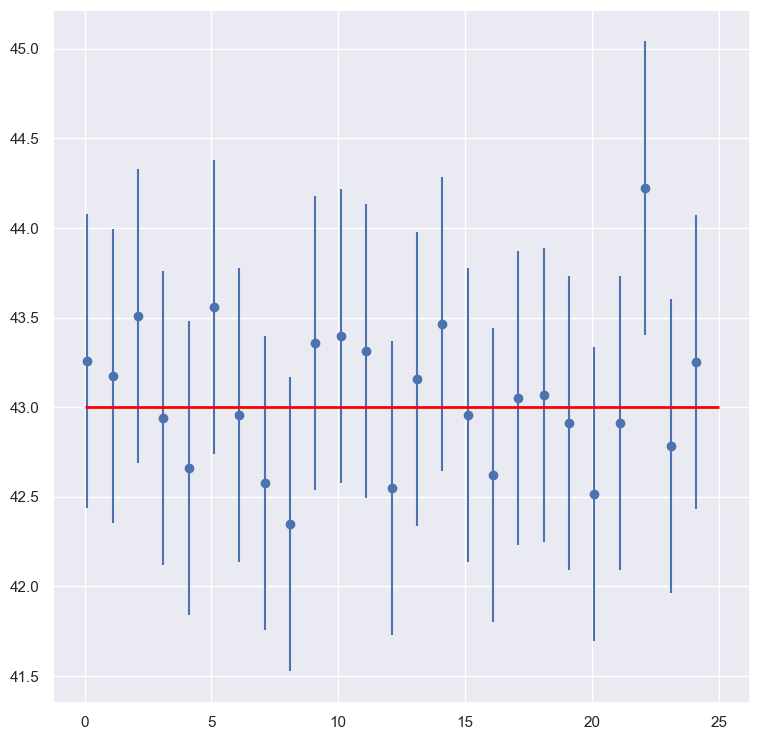

In [11]:
plt.figure(figsize=(9,9))

plt.errorbar(x=np.arange(0.1, 25, 1),
             y=sample_means,
             yerr=[(top-bot)/2 for bot,top in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=43.0023,
           linewidth=2.0,
           color="red")

Notice that in the plot above, all but one of the 95% confidence intervals overlap the red line marking the true mean. This is to be expected: since a 95% confidence interval captures the true mean 95% of the time, we'd expect our interval to miss the true mean 5% of the time.

If you don't know the standard deviation of the population, you have to use the standard deviation of your sample as a stand in when creating confidence intervals. Since the sample standard deviation may not match the population parameter the interval will have more error when you don't know the population standard deviation. To account for this error, we use what's known as a t-critical value instead of the z-critical value. The t-critical value is drawn from what's known as a t-distribution--a distribution that closely resembles the normal distribution but that gets wider and wider as the sample size falls. The t-distribution is available in scipy.stats with the nickname "t" so we can get t-critical values with stats.t.ppf().

Let's take a new, smaller sample and then create a confidence interval without the population standard deviation, using the t-distribution:

In [12]:
np.random.seed(10)

sample_size = 25
sample = np.random.choice(a=population_ages, size=sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q=0.975, df=sample_size - 1)  # Get the t-critical value*

print(f"t-critical value : {t_critical}") # Check the t-critical value

sample_stdev = sample.std(ddof=1) # Get the sample standard deviation
sigma = sample_stdev/math.sqrt(sample_size)  # Standard deviation estimate
margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

print(f"Confidence interval: {confidence_interval}")

t-critical value : 2.063898561628021
Confidence interval: (37.65147508161371, 48.108524918386294)


*Note*: when using the t-distribution, you have to supply the degrees of freedom (df). For this type of test, the degrees of freedom is equal to the sample size minus 1. If you have a large sample size, the t-distribution approaches the normal distribution.

Notice that the t-critical value is larger than the z-critical value we used for 95% confidence interval. This allows the confidence interval to cast a larger net to make up for the variability caused by using the sample standard deviation in place of the population standard deviation. The end result is a much wider confidence interval (an interval with a larger margin of error.).

If you have a large sample, the t-critical value will approach the z-critical value so there is little difference between using the normal distribution vs. the t-distribution:

In [13]:
# Check the difference between critical values with a sample size of 1000
stats.t.ppf(q=0.975, df=999) - stats.norm.ppf(0.975)

0.0023774765933946007

Instead of calculating a confidence interval for a mean point estimate by hand, you can calculate it using the Python function stats.t.interval():

In [14]:
stats.t.interval(confidence=0.95,              # Confidence level
                 df=24,                    # Degrees of freedom
                 loc=sample_mean,         # Sample mean
                 scale=sigma)             # Standard deviation estimate

(37.65147508161371, 48.108524918386294)

We can also make a confidence interval for a point estimate of a population proportion. In this case, the margin of error equals:

$$z*\sqrt{\frac{p(1-p)}{n}}$$

Where $z$ is the z-critical value for our confidence level, $p$ is the point estimate of the population proportion and $n$ is the sample size. Let's calculate a 95% confidence interval for Hispanics according to the sample proportion we calculated earlier (0.192):

In [15]:
# Record z-critical value
z_critical = stats.norm.ppf(0.975)

n = len(demo_sample) # Sample size
p = demo_sample.count('hispanic') / n # Point estimate of proportion

margin_of_error = z_critical * math.sqrt((p*(1-p))/n)

# Calculate the the interval
confidence_interval = (p - margin_of_error,
                       p + margin_of_error)

confidence_interval

(0.16758794241348748, 0.21641205758651252)

The output shows that the confidence interval captured the true population parameter of 0.2. Similar to our population mean point estimates, we can use the scipy stats.distribution.interval() function to calculate a confidence interval for a population proportion for us. In this case were working with z-critical values so we want to work with the normal distribution instead of the t distribution:

In [16]:
stats.norm.interval(confidence=0.95,    # Confidence level
                   loc=0.192,     # Point estimate of proportion
                   scale=math.sqrt((p*(1-p))/n))  # Scaling factor

(0.16758794241348748, 0.21641205758651252)

## Wrap Up

Estimating population parameters through sampling is a simple, yet powerful form of inference. Point estimates combined with error margins let us create confidence intervals that capture the true population parameter with high probability.

Next time we'll expand on the concepts in this lesson by learning about statistical hypothesis testing.